# **Hands-on Tutorial: Convolutional Neural Network (CNN) for MNIST Handwritten Digit Recognition with PyTorch**

**Uzair Ahmad**

---

Welcome to our hands-on tutorial on building a Convolutional Neural Network (CNN) for MNIST handwritten digit recognition using PyTorch! In this tutorial, you'll step into the exciting world of computer vision and learn how to train a neural network to recognize handwritten digits with high accuracy.

**What to Expect:**
- **Dataset Preparation:** We'll guide you through downloading and preprocessing the MNIST dataset—a classic dataset in the field of machine learning, containing grayscale images of handwritten digits (0-9).

- **Building the CNN Architecture:** You'll get hands-on experience creating a simple yet effective CNN architecture using PyTorch. We'll explore key concepts like convolutional layers, pooling, and fully connected layers.

- **Training the Model:** Dive into the training process as we walk you through the steps of initializing the CNN, defining a loss function, choosing an optimizer, and iterating through epochs to train the model.

- **Evaluation and Visualization:** Learn how to evaluate the model's performance on a separate test dataset and visualize the results using a confusion matrix.

- **Model Saving and Loading:** Discover how to save your trained model to use it later for inference or further training. We'll guide you through the process of loading a saved model.

Throughout the tutorial, insightful explanations and comments have been added to help you grasp the underlying concepts. Whether you're a beginner exploring neural networks or an enthusiast looking to sharpen your skills, this tutorial aims to provide a solid foundation in CNNs and their application to image classification tasks.

Let's embark on this journey together and bring your neural network to life for handwritten digit recognition!

In [3]:
# Import necessary libraries
import torch
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST

# The `CNN` class

In [4]:
# Define the Convolutional Neural Network (CNN) architecture
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7) # flatten the X
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = F.softmax(x, dim=1)
        return x

The `CNN` class is a custom Convolutional Neural Network (CNN) architecture defined using the PyTorch library. Let's break down each part of the class:

```python
class CNN(nn.Module):
```

This line defines a class named `CNN` that inherits from the `nn.Module` class, which is a base class for all neural network modules in PyTorch. This inheritance allows our `CNN` class to leverage functionalities provided by the `nn.Module` class.

```python
    def __init__(self):
        super(CNN, self).__init__()
```

The `__init__` method is the constructor of the class. It is called when an object of the class is created. In this method:
- `super(CNN, self).__init__()` calls the constructor of the parent class (`nn.Module`), initializing the necessary components.

```python
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
```

Here, we define the layers of our CNN:
- `nn.Conv2d`: Convolutional layer with specified input and output channels, kernel size, and padding.
- `nn.MaxPool2d`: Max pooling layer with a specified kernel size and stride.
- `nn.Linear`: Fully connected (linear) layer with specified input and output sizes.

These layers make up the convolutional and fully connected components of the neural network.

```python
    def forward(self, x):
```

The `forward` method defines the forward pass of the network. It specifies how input `x` should be processed through the network layers to produce the output.

```python
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
```

In the forward pass, the input `x` undergoes convolutional operations (`self.conv1` and `self.conv2`), followed by a ReLU activation function (`F.relu`), and max pooling (`self.pool`). These operations are repeated for two convolutional layers.

```python
        x = x.view(-1, 64 * 7 * 7)
```

After convolutional layers, the output is flattened using `view` to be compatible with the fully connected layers.

```python
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
```

The flattened output is then passed through two fully connected layers with ReLU activation in between.

```python
        return x
```

The final output of the forward pass is returned.

This `CNN` class represents a simple convolutional neural network architecture designed for MNIST handwritten digit recognition. It consists of convolutional layers, max pooling layers, and fully connected layers to learn hierarchical features from the input images.

# Load and Prepare data

In [5]:
# Set device (CPU or GPU)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Download and preprocess the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)

100%|██████████| 9912422/9912422 [00:00<00:00, 72975051.55it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 62408909.75it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 28312835.53it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 11616176.08it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



**Setting the Device (CPU or GPU)**:

```python
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
```

This line is responsible for determining the device on which the PyTorch tensors (data structures used in neural networks) will be stored and processed. PyTorch supports both CPU and GPU computations. The line uses a ternary conditional operator (`if-else` shorthand) to check if a GPU (CUDA device) is available using `torch.cuda.is_available()`. If a GPU is available, it sets the `device` to `"cuda:0"` (indicating GPU device 0), otherwise, it sets it to `"cpu"`.

So, this line ensures that your code can run on a GPU if one is available, and falls back to the CPU if not. Using a GPU can significantly speed up training neural networks, especially for large datasets and complex models.

** Downloading and Preprocessing the MNIST Dataset**:

```python
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
```

Here, `transforms.Compose` is used to chain together a series of image transformations. These transformations are applied to the input images during the dataset loading process. Specifically:

- `transforms.ToTensor()`: Converts the image data into PyTorch tensors. Neural networks in PyTorch operate on tensors rather than raw image data.

- `transforms.Normalize((0.5,), (0.5,))`: Normalizes the tensor values to have a mean of 0.5 and a standard deviation of 0.5. This normalization step helps the model converge faster during training.

In the context of the MNIST dataset, which consists of grayscale images with pixel values ranging from 0 to 255, the normalization brings the values to a range between -1 and 1.

These lines ensure that the MNIST dataset is loaded and preprocessed appropriately before being fed into the neural network for training. The combination of these transformations helps in preparing the data for effective learning by the model.

The next two lines of code are responsible for preparing the datasets and data loaders for training and testing your Convolutional Neural Network (CNN). Let's break down each line:

** 1. Initializing Training and Testing Datasets**:

```python
train_dataset = MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = MNIST(root='./data', train=False, download=True, transform=transform)
```

- **`MNIST` Class:** This line uses the `MNIST` class from the torchvision library to create instances of the training and testing datasets.

- **`root='./data'`:** This specifies the directory where the datasets will be stored. If the datasets are not found in this directory, they will be downloaded.

- **`train=True` and `train=False`:** These parameters indicate whether the datasets being created are for training (`train=True`) or testing (`train=False`).

- **`download=True`:** This parameter ensures that the datasets are downloaded if they are not already present in the specified root directory.

- **`transform=transform`:** The `transform` parameter is used to apply a series of image transformations to the datasets. In this case, it includes converting the images to tensors (`transforms.ToTensor()`) and normalizing the pixel values (`transforms.Normalize()`).

**Initializing Data Loaders**:

```python
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)
```

- **`DataLoader` Class:** This line uses the `DataLoader` class from PyTorch to create data loaders for the training and testing datasets. Data loaders are used to efficiently load batches of data during training.

- **`dataset=train_dataset` and `dataset=test_dataset`:** These parameters specify the datasets to be used by the respective data loaders.

- **`batch_size=32`:** This parameter determines the number of samples in each mini-batch. A mini-batch is a subset of the entire dataset used for updating the model's parameters during training.

- **`shuffle=True` and `shuffle=False`:** These parameters control whether the data should be shuffled before each epoch. Shuffling the data ensures that the model sees a different order of samples in each epoch during training, preventing it from learning the order of the data.

In summary, these lines set up the MNIST datasets for training and testing, and then create data loaders to efficiently load batches of data during the training and testing phases of your CNN. The `transform` parameter ensures that the data is preprocessed appropriately before being fed into the network.

# Initialize and train the model

In [6]:
# Initialize the CNN, loss function, and optimizer
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}")

Epoch 1/10, Loss: 1.6140311853408813
Epoch 2/10, Loss: 1.4824264051437377
Epoch 3/10, Loss: 1.4792095087051391
Epoch 4/10, Loss: 1.4759762804667156
Epoch 5/10, Loss: 1.47386194190979
Epoch 6/10, Loss: 1.472579007657369
Epoch 7/10, Loss: 1.4721262315114338
Epoch 8/10, Loss: 1.47193262907664
Epoch 9/10, Loss: 1.4715393255869547
Epoch 10/10, Loss: 1.4707341058095296


Let's break down the initialization and training of the model:

**Initializing the CNN, Loss Function, and Optimizer:**

```python
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
```

1. **Model Initialization (`model = CNN().to(device)`)**
   - This line creates an instance of your CNN model (`CNN()`) and sends it to the specified device (`device`). If a GPU is available, the model will be placed on the GPU; otherwise, it will be placed on the CPU.

2. **Loss Function (`criterion = nn.CrossEntropyLoss()`)**
   - The choice of a loss function is critical for training a neural network. In this case, `nn.CrossEntropyLoss()` is used. It is commonly used for classification problems and is suitable for multi-class classification tasks like MNIST digit recognition.

3. **Optimizer (`optimizer = optim.Adam(model.parameters(), lr=0.001)`)**
   - The optimizer is responsible for updating the model's parameters during training. Here, the Adam optimizer (`optim.Adam`) is used. It is an adaptive optimization algorithm that adjusts the learning rates of each parameter individually. `model.parameters()` provides the parameters to be optimized, and `lr=0.001` sets the learning rate.

**Training the Model**:

```python
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}")
```

1. **Epoch Loop (`for epoch in range(num_epochs)`)**
   - This loop iterates over the dataset for a specified number of epochs (`num_epochs`). An epoch is a complete pass through the entire training dataset.

2. **Model Training (`model.train()`)**
   - `model.train()` sets the model to training mode. This is necessary because certain layers, like dropout, behave differently during training and testing.

3. **Mini-Batch Loop (`for images, labels in train_loader`)**
   - This loop processes the dataset in mini-batches using the `train_loader`. Mini-batches are smaller subsets of the dataset, making it computationally feasible to train on large datasets.

4. **Zeroing Gradients (`optimizer.zero_grad()`)**
   - Before computing gradients, the gradients from the previous iteration need to be zeroed. This is because PyTorch accumulates gradients by default.

5. **Forward Pass (`outputs = model(images)`)**
   - The forward pass involves passing the input images through the model to obtain predictions (`outputs`).

6. **Compute Loss (`loss = criterion(outputs, labels)`)**
   - The loss is calculated by comparing the model's predictions (`outputs`) with the actual labels (`labels`) using the specified loss function (`criterion`).

7. **Backward Pass (`loss.backward()`)**
   - Gradients are computed with respect to the loss using backpropagation. This step calculates how much each model parameter contributed to the error.

8. **Optimization Step (`optimizer.step()`)**
   - The optimizer updates the model's parameters based on the computed gradients.

9. **Tracking Running Loss (`running_loss += loss.item()`)**
   - The running loss is accumulated to monitor the training progress.

10. **Print Epoch Information (`print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}")`)**
    - At the end of each epoch, the average training loss is printed to monitor the overall training performance.

This loop repeats for the specified number of epochs, updating the model's parameters to minimize the training loss and improve its ability to make accurate predictions.

# Save the trained model

In [7]:
# Save the trained model
torch.save(model.state_dict(), 'mnist_cnn_model.pth')

# Load and Evaluate

In [8]:
loaded_model = CNN().to(device)
loaded_model.load_state_dict(torch.load('mnist_cnn_model.pth'))
loaded_model.eval()  # Set the model to evaluation mode

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

Accuracy on the test set: 98.75%


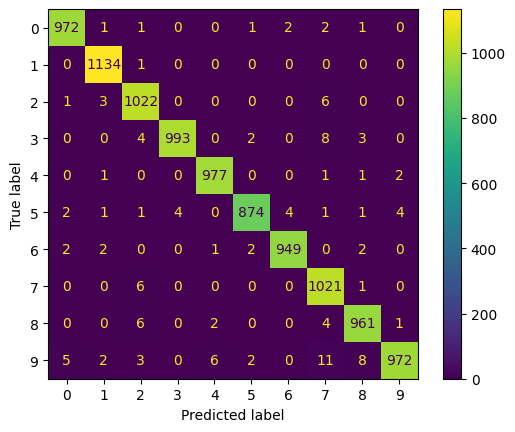

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# Evaluate the model
loaded_model.eval()
correct = 0
total = 0
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = loaded_model(images)
        _, predicted = torch.max(outputs.data, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

accuracy = correct / total
print(f"Accuracy on the test set: {accuracy*100}%")

# Compute and display the confusion matrix
cm = confusion_matrix(all_labels, all_preds, labels=range(10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap='viridis', values_format='d')
plt.show()


# Full code

In [ ]:

# Import necessary libraries
import torch
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST

# Define the Convolutional Neural Network (CNN) architecture
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7) # flatten the X
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = F.softmax(x, dim=1)
        return x

# Set device (CPU or GPU)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Download and preprocess the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)

# Initialize the CNN, loss function, and optimizer
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 2

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}")

# Visualizing a CNN

Visualizing a CNN can help you understand the architecture and the flow of information through different layers. PyTorch provides a handy tool called `torchsummary` that can be used to visualize the architecture of your CNN. Additionally, you can use other libraries like `matplotlib` to visualize the filters and feature maps.

Here's how you can visualize your CNN using `torchsummary` and `matplotlib`:



----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
         MaxPool2d-2           [-1, 32, 14, 14]               0
            Conv2d-3           [-1, 64, 14, 14]          18,496
         MaxPool2d-4             [-1, 64, 7, 7]               0
            Linear-5                  [-1, 128]         401,536
            Linear-6                   [-1, 10]           1,290
Total params: 421,642
Trainable params: 421,642
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.36
Params size (MB): 1.61
Estimated Total Size (MB): 1.97
----------------------------------------------------------------


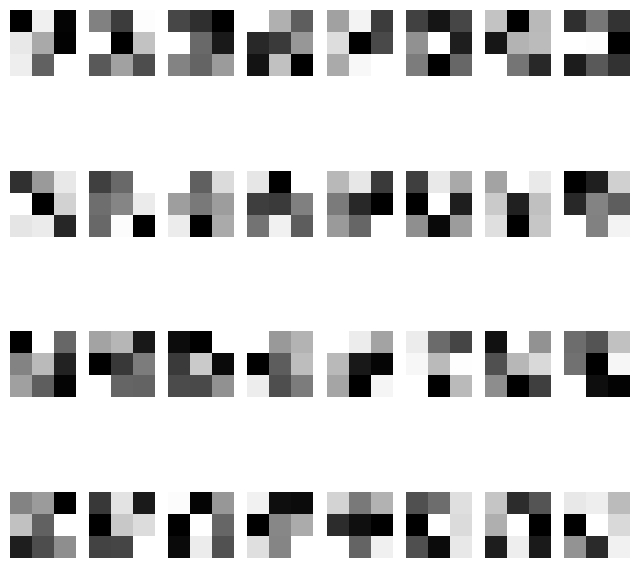

In [11]:
# Install torchsummary and matplotlib if you haven't already
# !pip install torchsummary
# !pip install matplotlib

import torchsummary
import matplotlib.pyplot as plt

# Create an instance of the CNN
model = CNN()

# Use torchsummary to display the model architecture
torchsummary.summary(model, (1, 28, 28))  # Assumes MNIST image size

# Visualize filters in the first convolutional layer
conv1_filters = model.conv1.weight.data.cpu().numpy()
plt.figure(figsize=(8, 8))
for i in range(conv1_filters.shape[0]):
    plt.subplot(4, 8, i + 1)
    plt.imshow(conv1_filters[i, 0, :, :], cmap='gray')
    plt.axis('off')
plt.show()



In this code:

1. Install `torchsummary` and `matplotlib` if you haven't already.
2. Create an instance of your CNN (`model = CNN()`).
3. Use `torchsummary.summary` to display the model architecture. It shows the layer names, input/output shapes, and the number of parameters.
4. Visualize filters in the first convolutional layer using `matplotlib`. This can give you insights into what kind of features the network is learning at the initial layer.

Make sure to adjust the input size `(1, 28, 28)` according to your input image size.

Feel free to explore other visualization techniques based on your specific requirements and the insights you want to gain from the CNN. Visualizing intermediate feature maps and activation layers during inference is also a common approach for understanding what the network is learning.